### Import the dependencies, libraries, modules, and the weather_api_key

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Add the requests library from Anaconda
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Import the API key.
from config import weather_api_key

### Add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.  In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

### Unpack the lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

### Build the basic URL for the OpenWeatherMap with weather_api_key added to the URL.

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1113308864fb7c97390b51d68b7ee217


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | tommot
Processing Record 3 of Set 1 | kosonsoy
Processing Record 4 of Set 1 | henties bay
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | ostersund
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | gat
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | balkhash
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | feltre
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | santa vitoria do palmar
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | belem de sao francisco
Processing Record 22 of Set 1 | aklavik
Processing Recor

City not found. Skipping...
Processing Record 36 of Set 4 | truckee
Processing Record 37 of Set 4 | bourail
Processing Record 38 of Set 4 | esmeraldas
Processing Record 39 of Set 4 | sept-iles
Processing Record 40 of Set 4 | anadyr
Processing Record 41 of Set 4 | bilma
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | itarema
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | palmer
Processing Record 47 of Set 4 | bani
Processing Record 48 of Set 4 | bajil
Processing Record 49 of Set 4 | huazolotitlan
City not found. Skipping...
Processing Record 50 of Set 4 | yumen
Processing Record 1 of Set 5 | xuddur
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | tambopata
Processing Record 4 of Set 5 | talara
Processing Record 5 of Set 5 | samusu
City not found. Skipping...
Processing Record 6 of Set 5 | kuruman
Processing Record 7 of Set 5 | asyut
Processing Record 8 of Set 5 |

Processing Record 26 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 27 of Set 8 | willowmore
Processing Record 28 of Set 8 | hirara
Processing Record 29 of Set 8 | goure
Processing Record 30 of Set 8 | souillac
Processing Record 31 of Set 8 | muros
Processing Record 32 of Set 8 | presidencia roque saenz pena
Processing Record 33 of Set 8 | longyearbyen
Processing Record 34 of Set 8 | leua
Processing Record 35 of Set 8 | cap-aux-meules
Processing Record 36 of Set 8 | vitimskiy
City not found. Skipping...
Processing Record 37 of Set 8 | pacific grove
Processing Record 38 of Set 8 | bichura
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | lerwick
Processing Record 41 of Set 8 | lavrentiya
Processing Record 42 of Set 8 | kamenka
Processing Record 43 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 44 of Set 8 | hihifo
City not found. Skipping...
Processing Record 45 of Set 8 | talgar
Processing Record 46 of Set 8 | roald
Proce

Processing Record 10 of Set 12 | grand gaube
Processing Record 11 of Set 12 | mushie
Processing Record 12 of Set 12 | cascais
Processing Record 13 of Set 12 | irece
Processing Record 14 of Set 12 | mococa
Processing Record 15 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 16 of Set 12 | yulara
Processing Record 17 of Set 12 | nelson bay
Processing Record 18 of Set 12 | winnemucca
Processing Record 19 of Set 12 | matara
Processing Record 20 of Set 12 | guaira
Processing Record 21 of Set 12 | carmelo
Processing Record 22 of Set 12 | susaki
Processing Record 23 of Set 12 | kyra
Processing Record 24 of Set 12 | mgandu
Processing Record 25 of Set 12 | taywarah
Processing Record 26 of Set 12 | chicama
Processing Record 27 of Set 12 | ewo
Processing Record 28 of Set 12 | korla
Processing Record 29 of Set 12 | penzance
Processing Record 30 of Set 12 | uray
Processing Record 31 of Set 12 | hojai
Processing Record 32 of Set 12 | namibe
Processing Record 33 of Set 12 | coquimbo
Processin

In [10]:
len(city_data)

555

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,81.05,77,81,10.58,PF,2021-04-06 22:56:17
1,Tommot,58.9564,126.2925,-0.62,89,26,2.39,RU,2021-04-06 22:59:34
2,Kosonsoy,41.2561,71.5508,48.20,61,0,6.91,UZ,2021-04-06 22:59:34
3,Henties Bay,-22.1160,14.2845,63.18,83,0,7.81,NA,2021-04-06 22:59:35
4,Airai,-8.9266,125.4092,64.74,79,77,0.56,TL,2021-04-06 22:47:21
5,Saint-Philippe,-21.3585,55.7679,77.00,69,0,4.61,RE,2021-04-06 22:59:35
6,Ostersund,63.1792,14.6357,33.01,69,75,17.27,SE,2021-04-06 22:59:35
7,Bluff,-46.6000,168.3333,57.99,82,100,8.99,NZ,2021-04-06 22:56:09
8,Gat,31.6100,34.7642,69.01,37,85,2.17,IL,2021-04-06 22:50:01
9,Geraldton,-28.7667,114.6000,68.00,77,60,5.75,AU,2021-04-06 22:59:36


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-04-06 22:56:17,-9.8000,-139.0333,81.05,77,81,10.58
1,Tommot,RU,2021-04-06 22:59:34,58.9564,126.2925,-0.62,89,26,2.39
2,Kosonsoy,UZ,2021-04-06 22:59:34,41.2561,71.5508,48.20,61,0,6.91
3,Henties Bay,NA,2021-04-06 22:59:35,-22.1160,14.2845,63.18,83,0,7.81
4,Airai,TL,2021-04-06 22:47:21,-8.9266,125.4092,64.74,79,77,0.56
5,Saint-Philippe,RE,2021-04-06 22:59:35,-21.3585,55.7679,77.00,69,0,4.61
6,Ostersund,SE,2021-04-06 22:59:35,63.1792,14.6357,33.01,69,75,17.27
7,Bluff,NZ,2021-04-06 22:56:09,-46.6000,168.3333,57.99,82,100,8.99
8,Gat,IL,2021-04-06 22:50:01,31.6100,34.7642,69.01,37,85,2.17
9,Geraldton,AU,2021-04-06 22:59:36,-28.7667,114.6000,68.00,77,60,5.75


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Create a series of scatter plots for each weather parameter against the latitude for all the cities.

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### City Latitude vs. Max Temperature

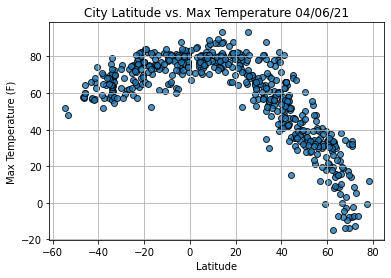

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### City Latitude vs. Humidity

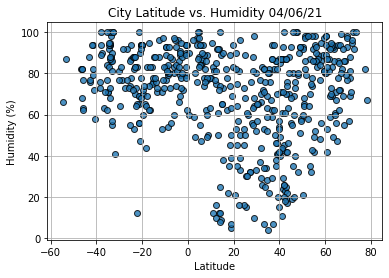

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### City Latitude vs. Cloudiness (%)

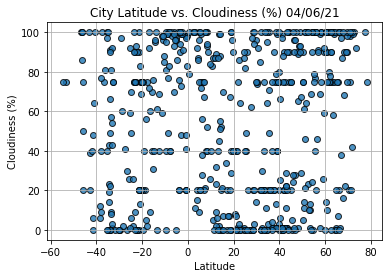

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### City Latitude vs. Wind Speed

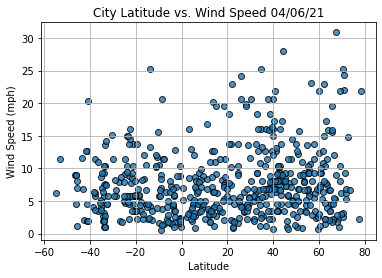

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Create a Linear Regression Function

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames

In [20]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2021-04-06 22:59:37
Lat                        -53.15
Lng                      -70.9167
Max Temp                     48.2
Humidity                       87
Cloudiness                     75
Wind Speed                   11.5
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
550     True
551     True
552     True
553     True
554    False
Name: Lat, Length: 555, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tommot,RU,2021-04-06 22:59:34,58.9564,126.2925,-0.62,89,26,2.39
2,Kosonsoy,UZ,2021-04-06 22:59:34,41.2561,71.5508,48.20,61,0,6.91
6,Ostersund,SE,2021-04-06 22:59:35,63.1792,14.6357,33.01,69,75,17.27
8,Gat,IL,2021-04-06 22:50:01,31.6100,34.7642,69.01,37,85,2.17
10,Jamestown,US,2021-04-06 22:56:50,42.0970,-79.2353,66.20,45,20,3.44


### Create DataFrames for the Northern and Southern Hemispheres' data.

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

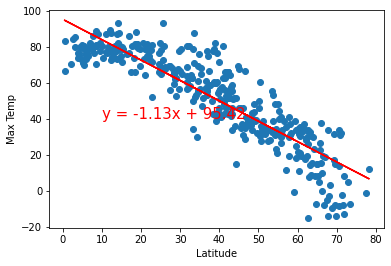

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

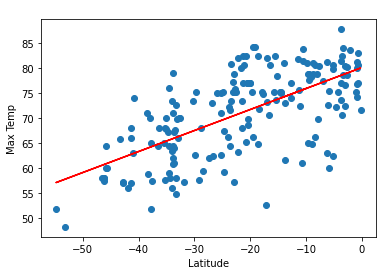

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

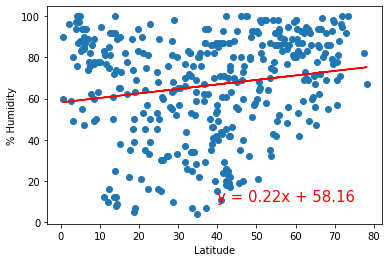

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

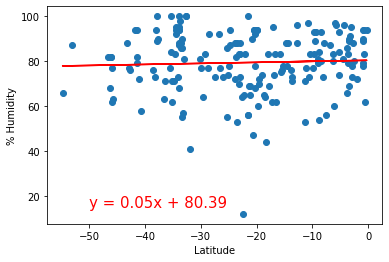

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

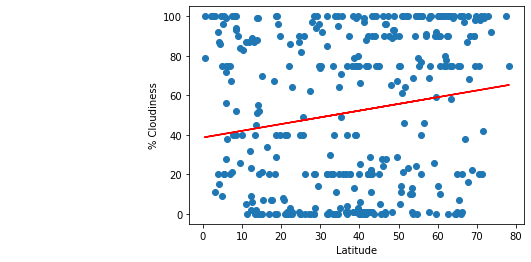

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,15))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

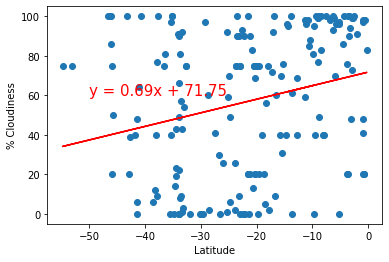

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

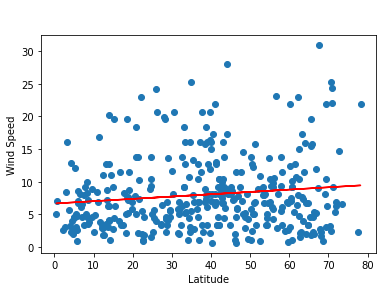

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

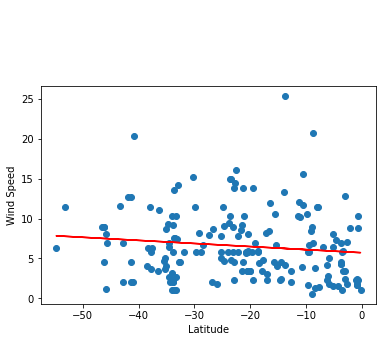

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-50,35))